In [1]:
%pip install pandas scikit-learn matplotlib seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# CSV 파일 로드
file_path_1request = 'results/classification_results_1requests.csv'
file_path_5request = 'results/classification_results_5requests.csv'
file_path_10request = 'results/classification_results_10requests.csv'
data_1 = pd.read_csv(file_path_1request)
data_5 = pd.read_csv(file_path_5request)
data_10 = pd.read_csv(file_path_10request)


# 예측 결과와 실제 결과 추출
y_pred_1= data_1['y_pred']
y_test_1 = data_1['y_test']

y_pred_5= data_5['y_pred']
y_test_5 = data_5['y_test']

y_pred_10= data_10['y_pred']
y_test_10 = data_10['y_test']

In [13]:
# 정확도 계산
accuracy = accuracy_score(y_test_1, y_pred_1)
print(f'Accuracy (1 request): {accuracy:.2f}')

accuracy = accuracy_score(y_test_5, y_pred_5)
print(f'Accuracy (5 request): {accuracy:.2f}')

accuracy = accuracy_score(y_test_10, y_pred_10)
print(f'Accuracy (10 request): {accuracy:.2f}')


Accuracy (1 request): 0.69
Accuracy (5 request): 0.94
Accuracy (10 request): 1.00


In [16]:
def calc_confusion_matrix(request_num, y_test, y_pred):
    # 혼동 행렬 계산
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f'============{request_num} requests=============')
    print(f'True Negatives: {tn}')
    print(f'False Positives: {fp}')
    print(f'False Negatives: {fn}')
    print(f'True Positives: {tp}')
    print(f'====================================')

    return cm


cm_1 = calc_confusion_matrix(1, y_test_1, y_pred_1)
cm_5 = calc_confusion_matrix(5, y_test_5, y_pred_5)
cm_10 = calc_confusion_matrix(10, y_test_10, y_pred_10)

============1 requests=============
True Negatives: 46
False Positives: 54
False Negatives: 7
True Positives: 93
============5 requests=============
True Negatives: 88
False Positives: 12
False Negatives: 0
True Positives: 100
============10 requests=============
True Negatives: 100
False Positives: 0
False Negatives: 0
True Positives: 100


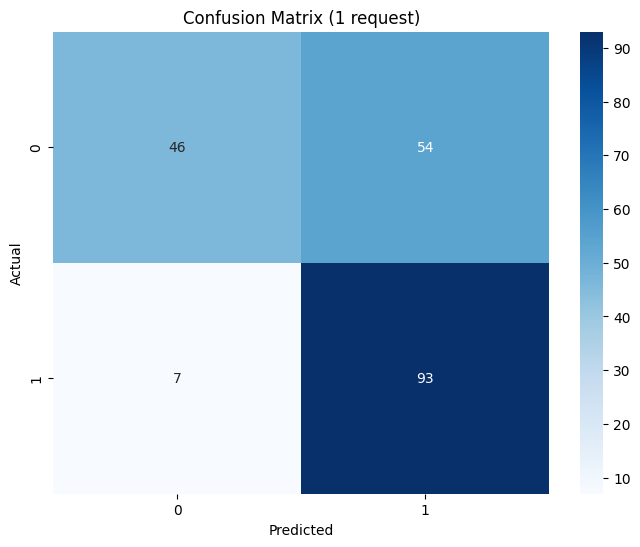

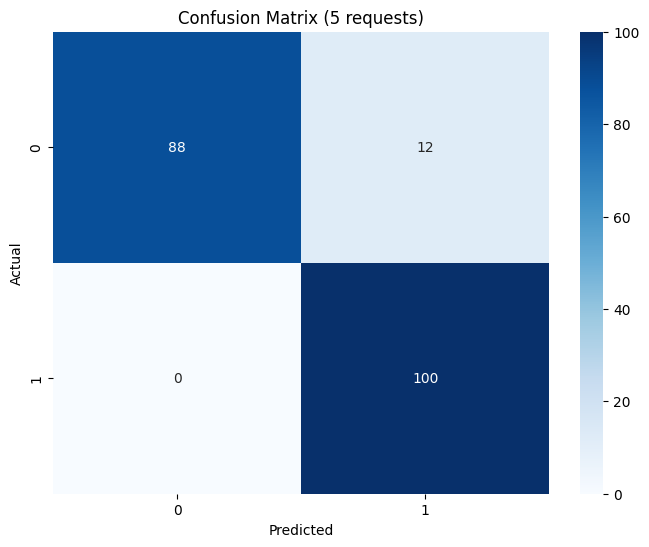

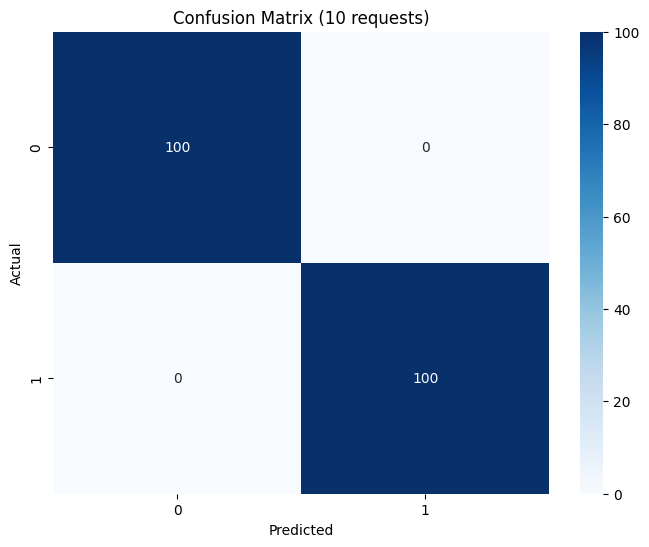

In [18]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (1 request)')
plt.show()

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm_5, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (5 requests)')
plt.show()

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm_10, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (10 requests)')
plt.show()

In [17]:
# 클래스 리포트
class_report = classification_report(y_test_1, y_pred_1)
print('Classification Report (1 request):')
print(class_report)

# 클래스 리포트
class_report = classification_report(y_test_5, y_pred_5)
print('Classification Report (5 request):')
print(class_report)

# 클래스 리포트
class_report = classification_report(y_test_10, y_pred_10)
print('Classification Report (10 request):')
print(class_report)


Classification Report (1 request):
              precision    recall  f1-score   support

   anomalous       0.87      0.46      0.60       100
      normal       0.63      0.93      0.75       100

    accuracy                           0.69       200
   macro avg       0.75      0.70      0.68       200
weighted avg       0.75      0.69      0.68       200

Classification Report (5 request):
              precision    recall  f1-score   support

   anomalous       1.00      0.88      0.94       100
      normal       0.89      1.00      0.94       100

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200

Classification Report (10 request):
              precision    recall  f1-score   support

   anomalous       1.00      1.00      1.00       100
      normal       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.0